<a href="https://colab.research.google.com/github/Hramchenko/HTR/blob/master/colab_install_deps_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip3 install torch torchvision
!pip3 install opencv-python
import torch

In [2]:
print("Device " + torch.cuda.get_device_name(0))
device = torch.device("cuda:0")
print(device)

Device Tesla K80
cuda:0


In [0]:
from google.colab import drive
drive.mount('/gdrive')

In [0]:
!ls /gdrive/My\ Drive/ML/IAM/

In [0]:
!mkdir ./IAM

!cp -R -f /gdrive/My\ Drive/ML/IAM/ascii/ ./IAM/ascii
!cp -f /gdrive/My\ Drive/ML/IAM/words.test.pkl ./IAM/
!cp -f /gdrive/My\ Drive/ML/IAM/words.train.pkl ./IAM/


In [0]:
!cp -R -f /gdrive/My\ Drive/ML/MyLetters ./

In [0]:
!git clone https://github.com/Hramchenko/Handwritting.git

In [8]:
!cd ./Handwritting/ && git pull 

Already up to date.


In [0]:
import sys
sys.path.append("./Handwritting/")

In [10]:
from IAMWords import IAMWords
words = IAMWords("train", "./IAM/", line_height=200, line_width=1500, scale=1.2)

Reading ./IAM/words.train.pkl...
Reading finished


In [0]:
words.to_start(3)

In [0]:
data, target = words.make_batch(use_binarization=False)

In [0]:
%matplotlib inline

In [14]:
data.shape

torch.Size([50, 200, 1500])

his


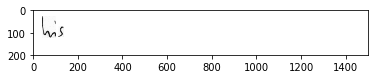

and


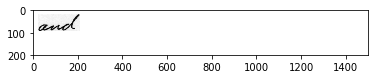

was


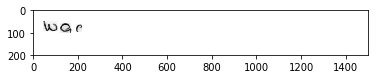

who


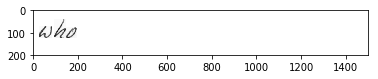

the


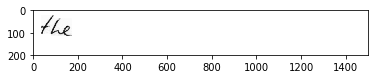

the


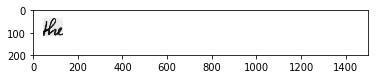

his


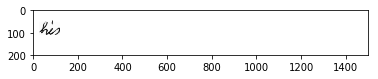

the


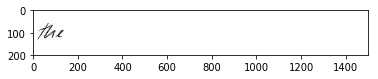

new


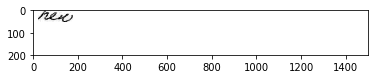

and


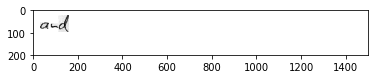

In [15]:
import matplotlib.pyplot as plt
for i in range(0, 10):
  print(words.decode_word(target[i,:]))
  plt.imshow(data[i], cmap="gray")
  plt.show()